## Sckit Learn Machine Learning - Diabetes dataset

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import numpy.random as npr
import matplotlib.pyplot as plt

## Machine Learning :
-  A machine learning (ML) algorithm uses experience or data to make predictions about future events
or observations. ML problems involve observations (dependent variable) and features (explanatory
variables). The algorithm searches for relationships between the features and observations, such
that future observations can be predicted.

The scikit-learn (often shortened to sklearn) package is a very comprehensive set of ML tools for
fitting and evaluating prediction methods
All of the methods are fitted in roughly the same manner, making it very easy to learn and hence
compare the performance of different methods.

In [5]:
from sklearn import datasets

In [6]:
diabetes = datasets.load_diabetes()

In [10]:
# showing feature names in diabestes dataset
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [18]:
# converting to dataframe
X_raw = DataFrame(diabetes.data,columns=diabetes.feature_names)
# standardizing feature matrix
X_std = (X_raw - X_raw.mean())/X_raw.std()
X = X_std
y = Series(diabetes.target)

In [19]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.799594,1.064282,1.295620,0.459319,-0.928693,-0.731236,-0.911418,-0.054438,0.418077,-0.370569
1,-0.039522,-0.937474,-1.080955,-0.552885,-0.177423,-0.402430,1.562643,-0.829361,-1.434925,-1.936285
2,1.791277,1.064282,0.933475,-0.119083,-0.957588,-0.718084,-0.679475,-0.054438,0.060139,-0.544537
3,-1.870322,-0.937474,-0.243495,-0.769785,0.256002,0.524802,-0.756789,0.720486,0.476532,-0.196600
4,0.113044,-0.937474,-0.764079,0.459319,0.082632,0.327519,0.170984,-0.054438,-0.671820,-0.979458


### Training and Test set

We have 442 observations so will split the data into training and test sets of size 332 and 110
respectively. Importantly, the data for each set must be selected randomly and each observation
must only appear in one of the sets.

In [20]:
train_size = 332
np.random.seed(123)
train_select = np.random.permutation(range(len(y)))
X_train = X.iloc[train_select[:train_size],:].reset_index(drop=True)
X_test = X.iloc[train_select[train_size:],:].reset_index(drop=True)
y_train = y[train_select[:train_size]].reset_index(drop=True)
y_test = y[train_select[train_size:]].reset_index(drop=True)

### Regression

In [30]:
# import linear_model from sklearn
from sklearn import linear_model

In [22]:
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [23]:
reg.coef_

array([ -0.1969964 , -14.06282061,  24.3095999 ,  12.74122201,
       -26.31223713,  11.39253497,   2.04720508,   9.09215082,
        36.80321586,   2.26848318])

We can also use the model to predict the response variable for unseen data, such as the test data.

In [25]:
reg_test_pred = reg.predict(X_test)

A sensible way to assess the model’s performance is to plot the actual values of y versus the
predictions.

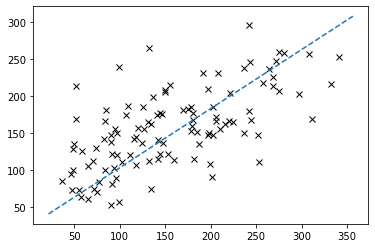

In [26]:
fig = plt.figure()
plt.plot(y_test,reg_test_pred,'kx')
plt.plot(plt.xlim(), plt.ylim(), ls="--")

The mean square error (MSE) will also tell us how well the model performs. The MSE is a measure
of the discrepancy between the data and an estimation model, where a small value indicates a tight
fit.

In [27]:
MSE_reg = np.mean(pow((reg_test_pred - y_test),2))
print(MSE_reg)

3316.122587674067


#### Generally, we compare MSE values with other other models and compare if the value is small or not.